In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
mnist = tf.keras.datasets.mnist

In [23]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [25]:
X_train = tf.keras.utils.normalize(X_train, axis= 1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train)
model.save("Handwritten Model")

1875/1875 [==============================] - 1s 612us/step - loss: 0.1079 - accuracy: 0.9671
INFO:tensorflow:Assets written to: Handwritten Model/assets


In [30]:
model = tf.keras.models.load_model('Handwritten Model')

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 345us/step - loss: 0.1101 - accuracy: 0.9661


In [32]:
print(loss)
print(accuracy)

0.1101311519742012
0.9660999774932861


1/1 [==============================] - 0s 9ms/step
This digit is probably a 7


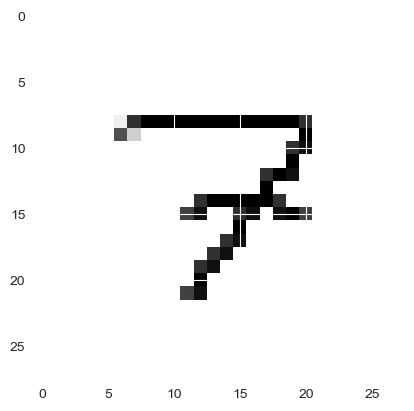

1/1 [==============================] - 0s 7ms/step
This digit is probably a 2


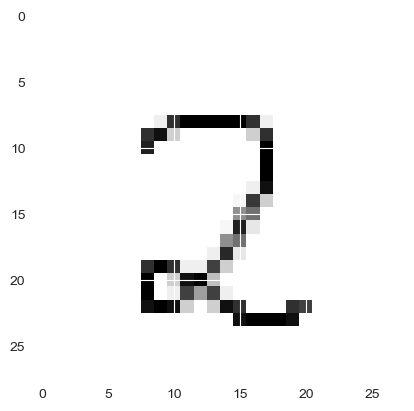

1/1 [==============================] - 0s 6ms/step
This digit is probably a 9


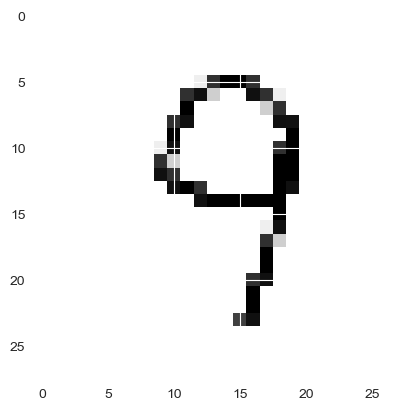

1/1 [==============================] - 0s 7ms/step
This digit is probably a 8


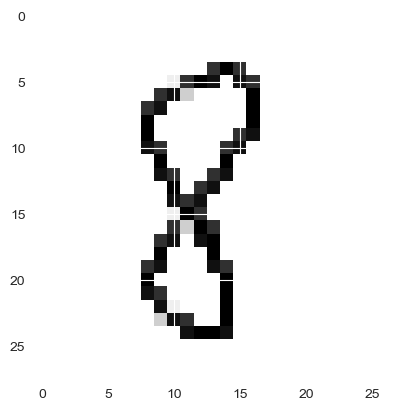

1/1 [==============================] - 0s 7ms/step
This digit is probably a 6


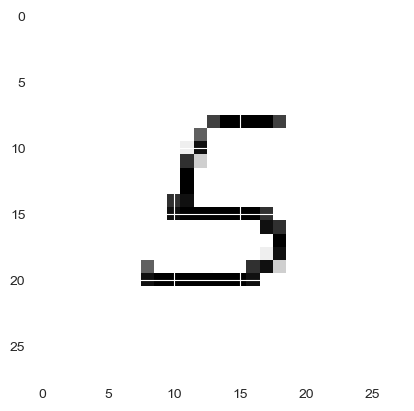

1/1 [==============================] - 0s 7ms/step
This digit is probably a 6


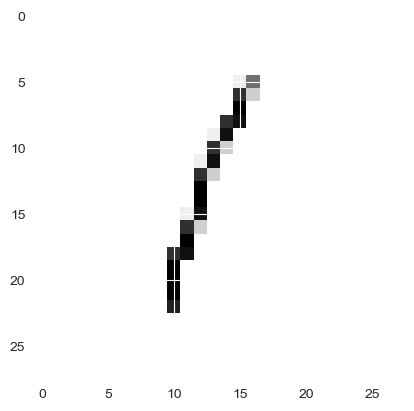

1/1 [==============================] - 0s 7ms/step
This digit is probably a 1


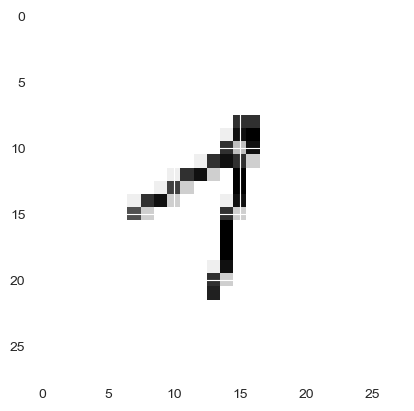

1/1 [==============================] - 0s 8ms/step
This digit is probably a 1


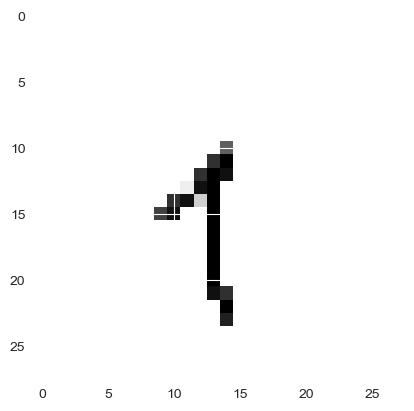

1/1 [==============================] - 0s 7ms/step
This digit is probably a 7


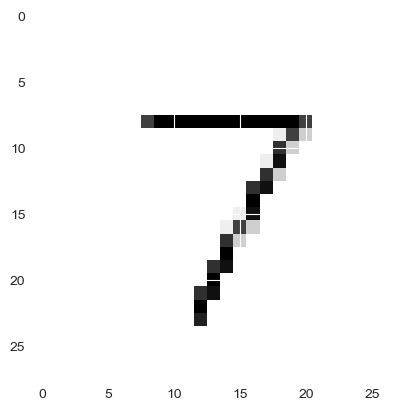

1/1 [==============================] - 0s 7ms/step
This digit is probably a 7


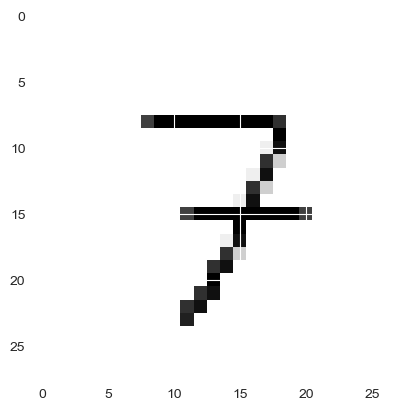

1/1 [==============================] - 0s 7ms/step
This digit is probably a 0


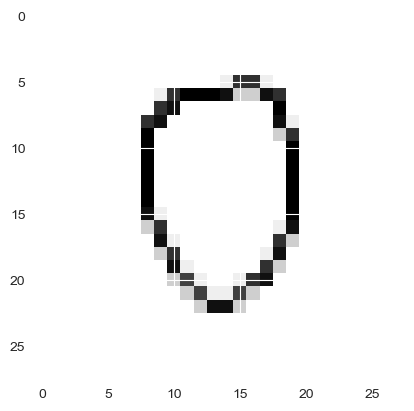

1/1 [==============================] - 0s 7ms/step
This digit is probably a 1


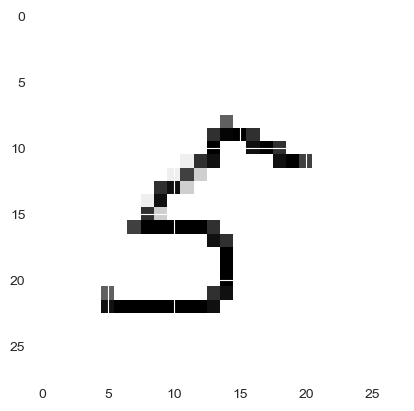

1/1 [==============================] - 0s 7ms/step
This digit is probably a 3


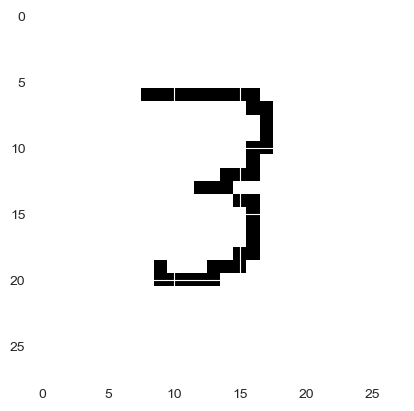

1/1 [==============================] - 0s 7ms/step
This digit is probably a 2


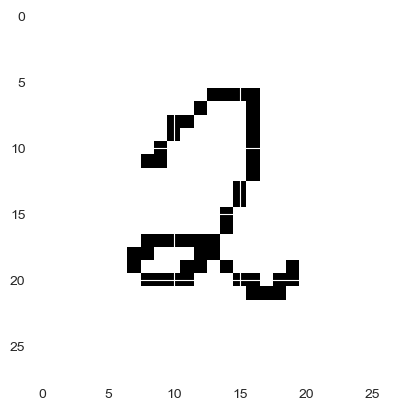

1/1 [==============================] - 0s 7ms/step
This digit is probably a 1


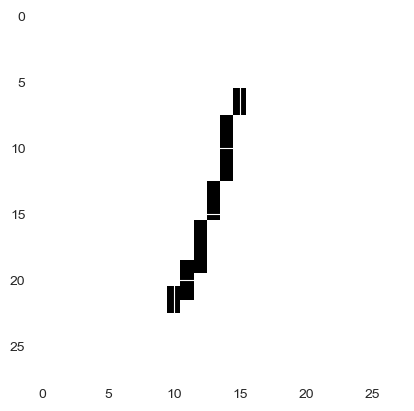

1/1 [==============================] - 0s 7ms/step
This digit is probably a 0


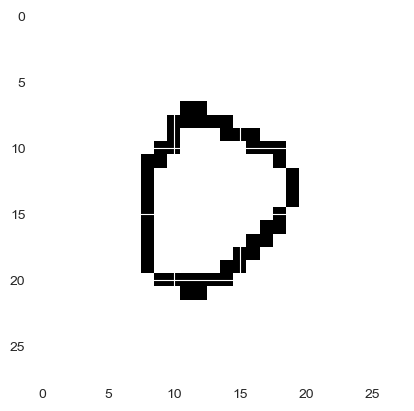

1/1 [==============================] - 0s 7ms/step
This digit is probably a 1


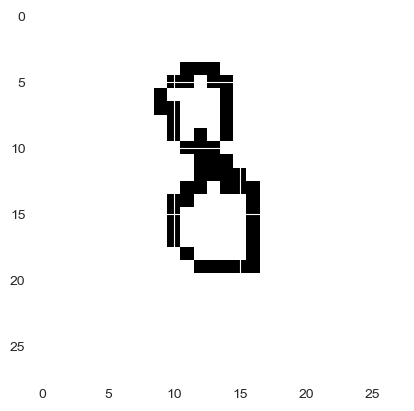

1/1 [==============================] - 0s 7ms/step
This digit is probably a 7


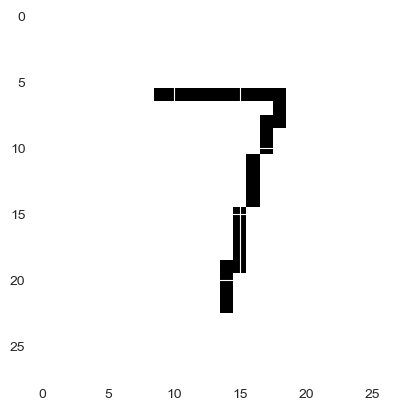

1/1 [==============================] - 0s 7ms/step
This digit is probably a 4


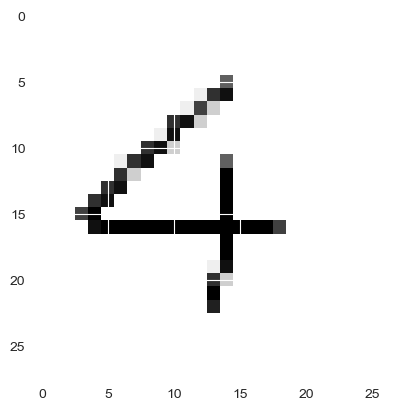

In [35]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap= plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1